In [16]:
import seaborn as sns
import pandas as pd
#load the dataset
import matplotlib.pyplot as plt
titanic_df = sns.load_dataset('titanic')
#detect misssing values
missing_values = titanic_df.isnull()
missing_values.head(10)
#get the number of missing values
number = missing_values.sum()
print(number)
#copy original data
titanic_copy = titanic_df.copy()
#droping the missing values
titanic_copy.dropna(inplace=True)
#check if the missing values are drop
print(titanic_copy.isnull().sum())

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64
survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64


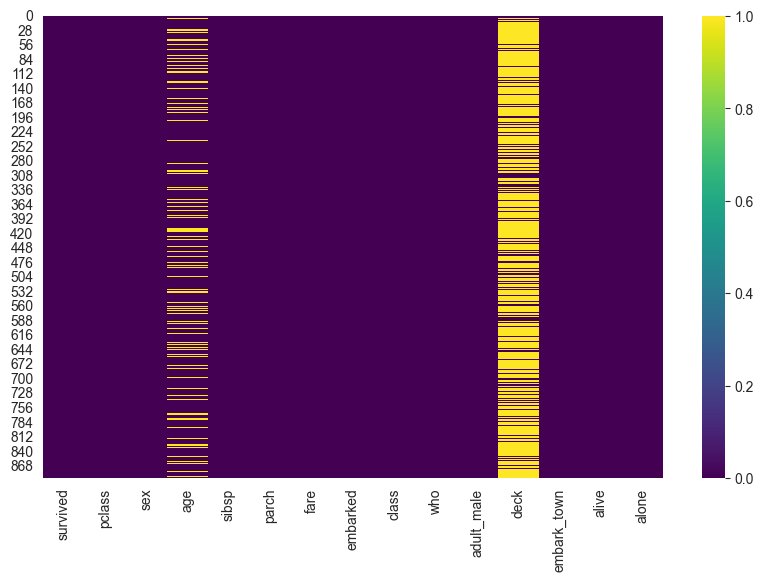

In [17]:
#lets visualize missing data with heat map
plt.figure(figsize=(10,6))
heat_map = sns.heatmap(missing_values, cmap='viridis')
plt.show()

In [18]:
#handling missing values by imputations
#imput missing values using mean
titanic_df['age']= titanic_df['age'].fillna(titanic_df['age'].mean()) #inplace=True)
print(titanic_df.isnull().sum())

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [19]:
#input the missing values with backward fill
titanic_df['age'] = titanic_df['age'].fillna(method='bfill', inplace=True)
print(titanic_df.isnull().sum())

survived         0
pclass           0
sex              0
age            891
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


C:\Users\juliu\AppData\Local\Temp\ipykernel_3364\2513049633.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_df['age'] = titanic_df['age'].fillna(method='bfill', inplace=True)
C:\Users\juliu\AppData\Local\Temp\ipykernel_3364\2513049633.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  titanic_df['age'] = titanic_df['age'].fillna(method='bfill', inplace=True)


In [20]:
#display categorical variables
print(titanic_df['sex'].unique())
print(titanic_df['embark_town'].unique())
#encoding sex in titanic dataset
titanic_df['sex_encoded'] = pd.factorize(titanic_df['sex'])[0]
print(titanic_df[['sex', 'sex_encoded']].head())

#using one _hot encoding for embarked town which is using to encode categorical variables. it creates
#a binary category in the variable
encode_df = pd.get_dummies(titanic_df['embark_town'], prefix='town')
#concat them
titanic_df = pd.concat([titanic_df, encode_df], axis=1)
print(titanic_df)

['male' 'female']
['Southampton' 'Cherbourg' 'Queenstown' nan]
      sex  sex_encoded
0    male            0
1  female            1
2  female            1
3  female            1
4    male            0
     survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  None      1      0   7.2500        S   Third   
1           1       1  female  None      1      0  71.2833        C   First   
2           1       3  female  None      0      0   7.9250        S   Third   
3           1       1  female  None      1      0  53.1000        S   First   
4           0       3    male  None      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  None      0      0  13.0000        S  Second   
887         1       1  female  None      0      0  30.0000        S   First   
888         0       3  female  None      1      2  23.4500        S   Third   
889      

Correlation is a term that indicates the degree to which two variables move in relation  to each other.
if two values are highly correlated, they carry similar information.
correlation near 1 indicates a positive high correlation
correlation near -1 indicates a negative correlation
and correlation near 0 indicates no correlation

                  survived    pclass     sibsp     parch      fare  \
survived          1.000000 -0.338481 -0.035322  0.081629  0.257307   
pclass           -0.338481  1.000000  0.083081  0.018443 -0.549500   
sibsp            -0.035322  0.083081  1.000000  0.414838  0.159651   
parch             0.081629  0.018443  0.414838  1.000000  0.216225   
fare              0.257307 -0.549500  0.159651  0.216225  1.000000   
adult_male       -0.557080  0.094035 -0.253586 -0.349943 -0.182024   
alone            -0.203367  0.135207 -0.584471 -0.583398 -0.271832   
sex_encoded       0.543351 -0.131900  0.114631  0.245489  0.182333   
town_Cherbourg    0.168240 -0.243292 -0.059528 -0.011069  0.269335   
town_Queenstown   0.003650  0.221009 -0.026354 -0.081228 -0.117216   
town_Southampton -0.155660  0.081720  0.070941  0.063036 -0.166603   

                  adult_male     alone  sex_encoded  town_Cherbourg  \
survived           -0.557080 -0.203367     0.543351        0.168240   
pclass           

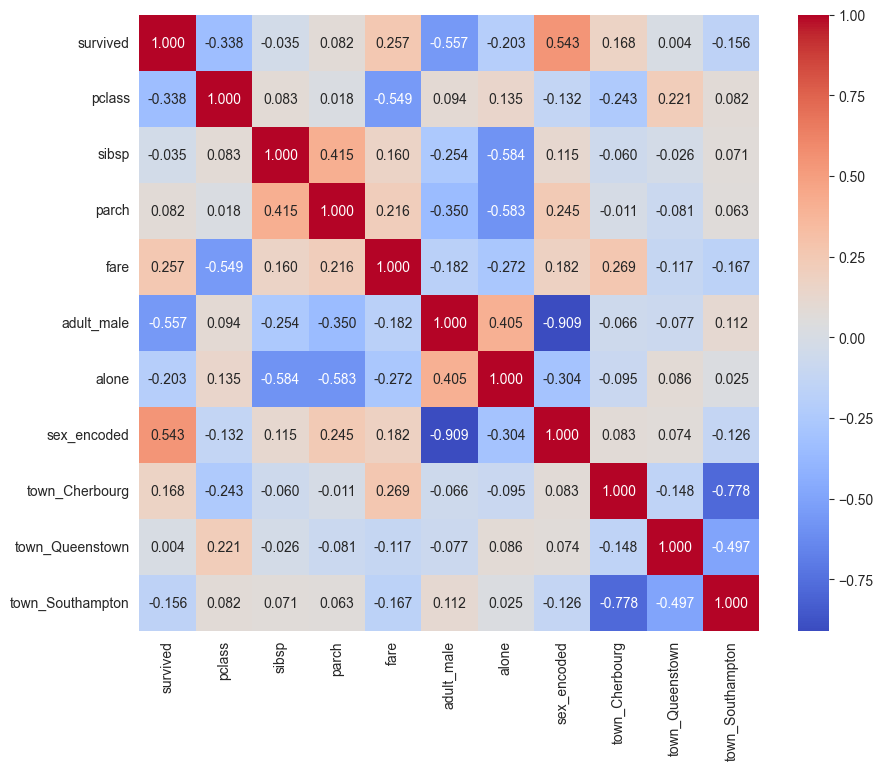

Correlation between fare and pclass: -0.5494996199439076
   survived  pclass     sex   age  sibsp  parch embarked  class    who  \
0         0       3    male  None      1      0        S  Third    man   
1         1       1  female  None      1      0        C  First  woman   
2         1       3  female  None      0      0        S  Third  woman   
3         1       1  female  None      1      0        S  First  woman   
4         0       3    male  None      0      0        S  Third    man   

   adult_male deck  embark_town alive  alone  sex_encoded  town_Cherbourg  \
0        True  NaN  Southampton    no  False            0           False   
1       False    C    Cherbourg   yes  False            1            True   
2       False  NaN  Southampton   yes   True            1           False   
3       False    C  Southampton   yes  False            1           False   
4        True  NaN  Southampton    no   True            0           False   

   town_Queenstown  town_Southampto

In [21]:
corr_matrix  = titanic_df.corr(numeric_only=True)
print(corr_matrix)
#create heat map
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.3f', cmap='coolwarm')
plt.show()

#if fare and pclass are highly correlated, remove one and leave the one
#correlation between fare and pessenger class
correlation = corr_matrix['fare']['pclass']
print(f'Correlation between fare and pclass: {correlation}')
clean_df = titanic_df.drop('fare', axis=1)
print(clean_df.head())